In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = './health_claims.csv'
data = pd.read_csv(file_path, index_col=0)

# Inspect the data
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
275022,BENE78279,CLM704301,2009-11-28,2009-11-28,PRV55215,40,PHY386653,NaN,NaN,NaN,...,1,1,1,2,2,0,0,6530,360,Yes
84572,BENE23552,CLM352275,2009-05-11,2009-05-11,PRV51081,500,PHY325118,NaN,NaN,NaN,...,1,2,2,2,2,0,0,1700,1530,No
234874,BENE66787,CLM441102,2009-06-28,2009-06-28,PRV53733,60,PHY412216,NaN,PHY412216,NaN,...,1,2,2,1,2,0,0,3160,1100,No
412183,BENE117455,CLM425806,2009-06-20,2009-06-23,PRV52090,400,PHY402729,PHY402729,PHY402729,NaN,...,2,1,1,2,2,0,0,400,0,No
471585,BENE134333,CLM743731,2009-12-24,2009-12-24,PRV57014,30,PHY325488,NaN,NaN,NaN,...,1,1,2,2,1,0,0,2920,90,No


In [2]:
print("\nData Information:")
print(data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 55821 entries, 275022 to 528590
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           55821 non-null  object 
 1   ClaimID                          55821 non-null  object 
 2   ClaimStartDt                     55821 non-null  object 
 3   ClaimEndDt                       55821 non-null  object 
 4   Provider                         55821 non-null  object 
 5   InscClaimAmtReimbursed           55821 non-null  int64  
 6   AttendingPhysician               55668 non-null  object 
 7   OperatingPhysician               11305 non-null  object 
 8   OtherPhysician                   20029 non-null  object 
 9   AdmissionDt                      3967 non-null   object 
 10  ClmAdmitDiagnosisCode            14490 non-null  object 
 11  DeductibleAmtPaid                55721 non-null  float64
 12

In [3]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       InscClaimAmtReimbursed  DeductibleAmtPaid  ClmProcedureCode_1  \
count            55821.000000       55721.000000         2303.000000   
mean               982.348041          76.646614         5916.113765   
std               3807.733996         271.166854         3037.857570   
min                  0.000000           0.000000           17.000000   
25%                 40.000000           0.000000         3845.000000   
50%                 80.000000           0.000000         5459.000000   
75%                300.000000           0.000000         8628.000000   
max             125000.000000        1068.000000         9999.000000   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
count          532.000000           98.000000           11.000000   
mean          4058.661654         3609.357143         3859.272727   
std           2024.072899         1745.546718         1508.721253   
min             66.000000          185.000000         

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
BeneID                                 0
ClaimID                                0
ClaimStartDt                           0
ClaimEndDt                             0
Provider                               0
InscClaimAmtReimbursed                 0
AttendingPhysician                   153
OperatingPhysician                 44516
OtherPhysician                     35792
AdmissionDt                        51854
ClmAdmitDiagnosisCode              41331
DeductibleAmtPaid                    100
DischargeDt                        51854
DiagnosisGroupCode                 51854
ClmDiagnosisCode_1                  1039
ClmDiagnosisCode_2                 19570
ClmDiagnosisCode_3                 31579
ClmDiagnosisCode_4                 39475
ClmDiagnosisCode_5                 44758
ClmDiagnosisCode_6                 47464
ClmDiagnosisCode_7                 49300
ClmDiagnosisCode_8                 50574
ClmDiagnosisCode_9                 51724
ClmDiagnosisCode_10                55356

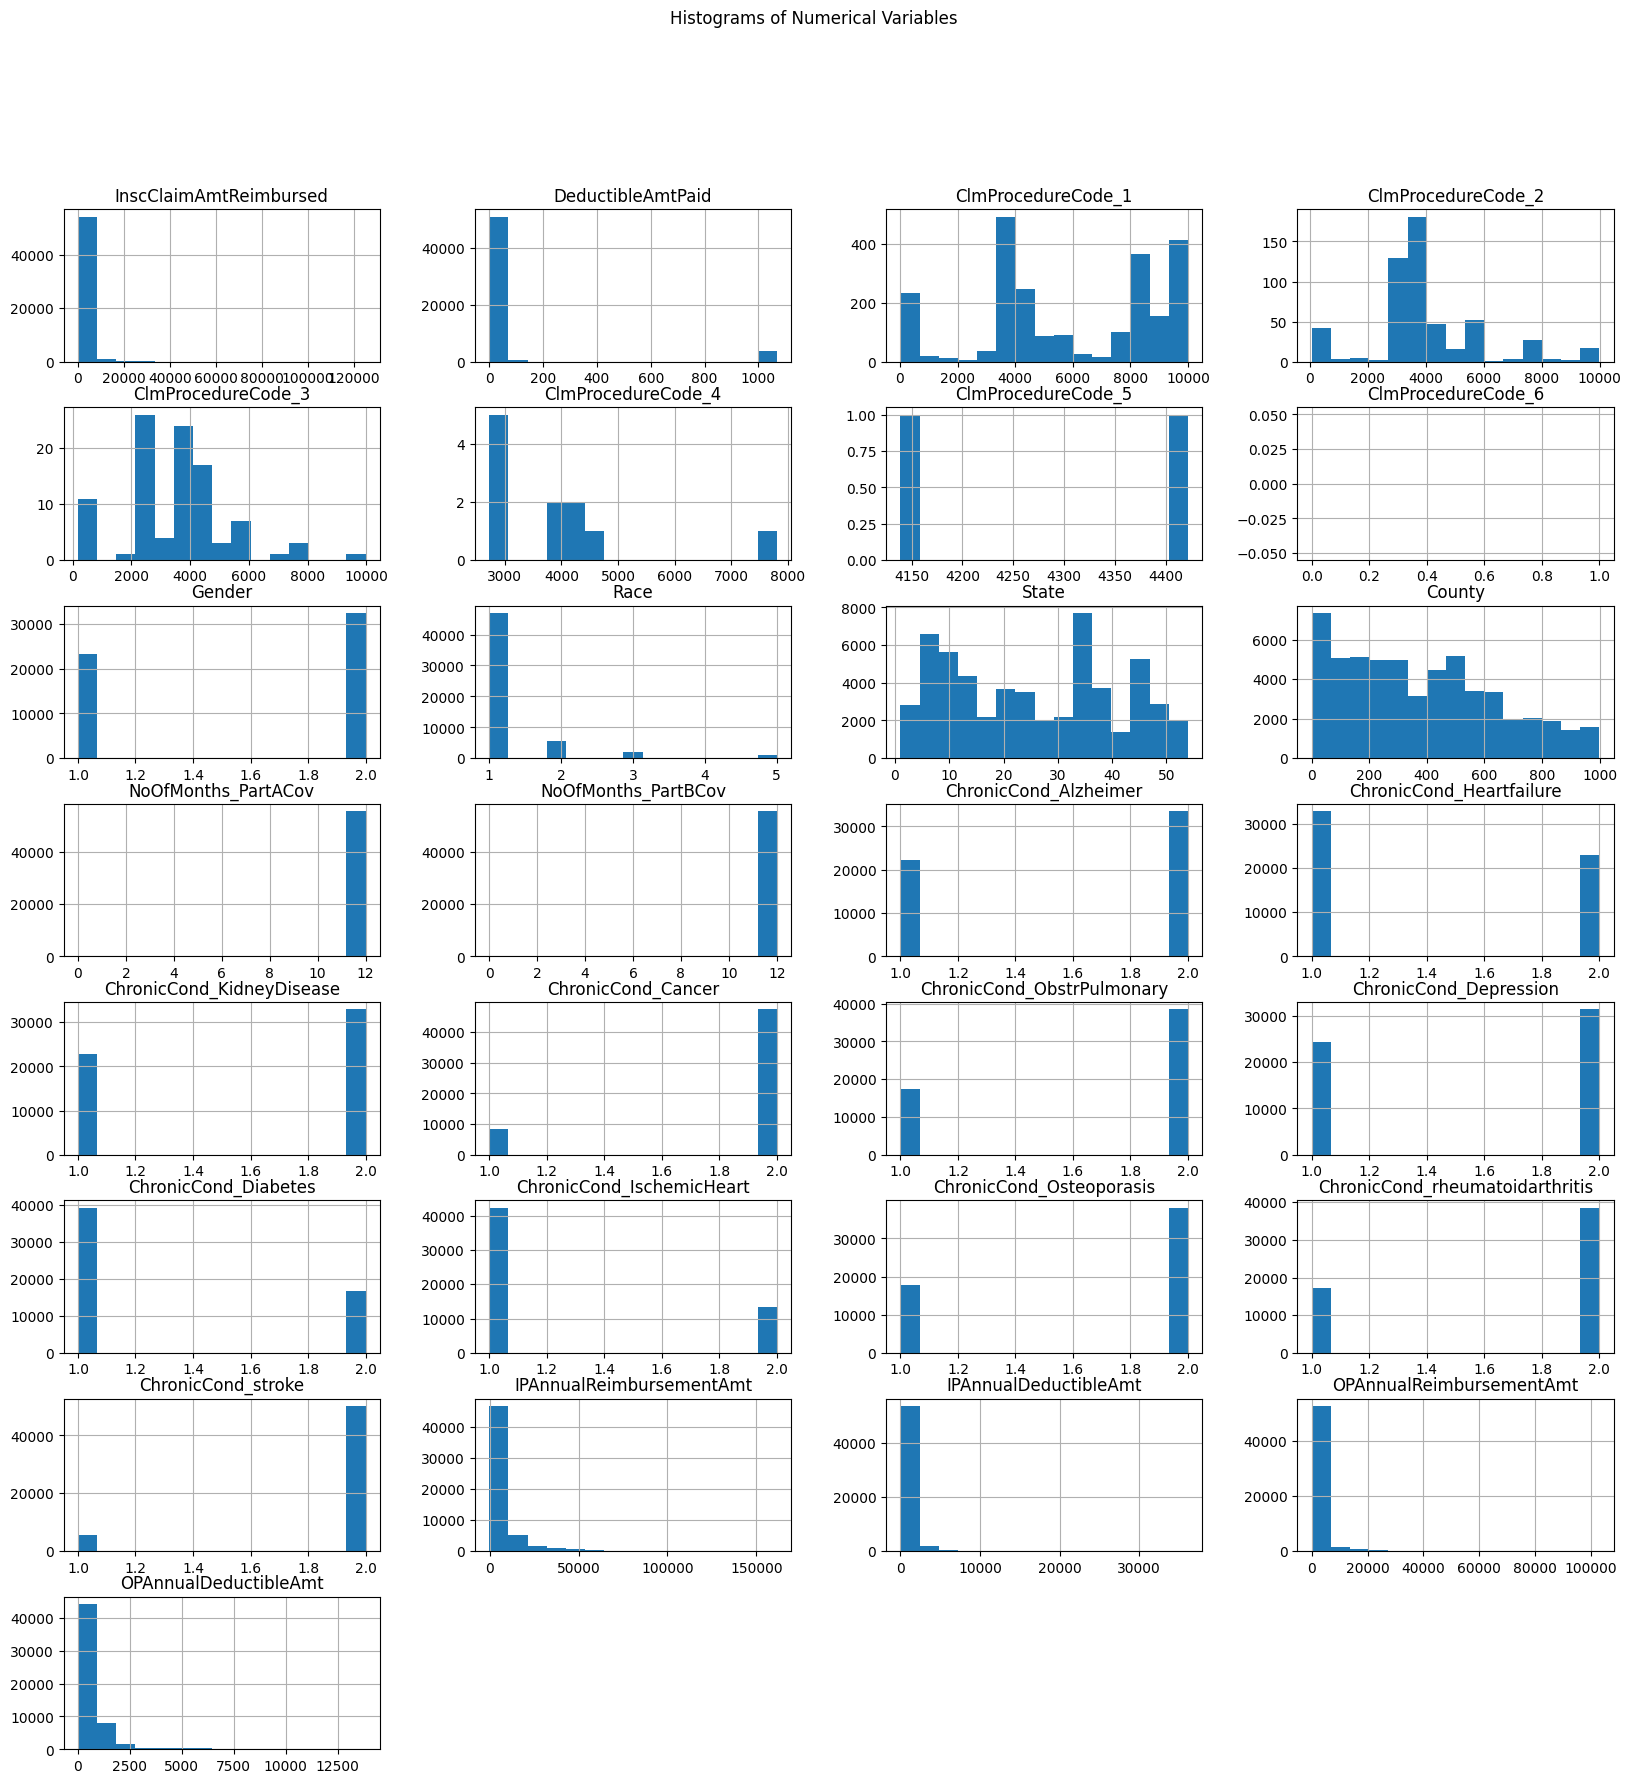

In [5]:
# Visualize distributions of numerical variables
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols].hist(bins=15, figsize=(20,20), layout=(8,4))

plt.suptitle('Histograms of Numerical Variables')
plt.show()

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'DOB', 'DOD',
       'RenalDiseaseIndicator', 'PotentialFraud'],
      dtype='object')

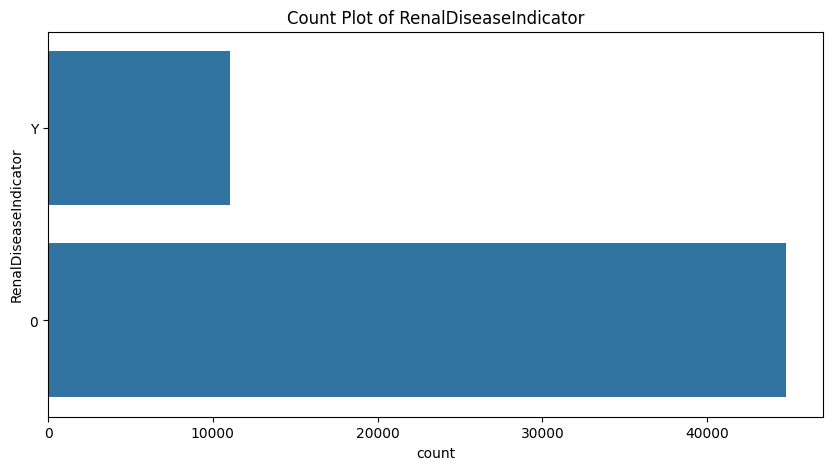

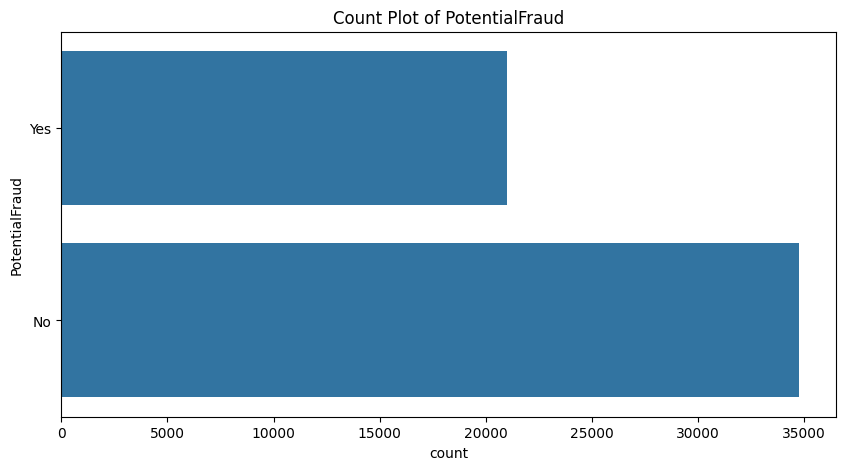

In [7]:
columns = ['RenalDiseaseIndicator','PotentialFraud']
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=data)
    plt.title(f'Count Plot of {col}')
    plt.show()

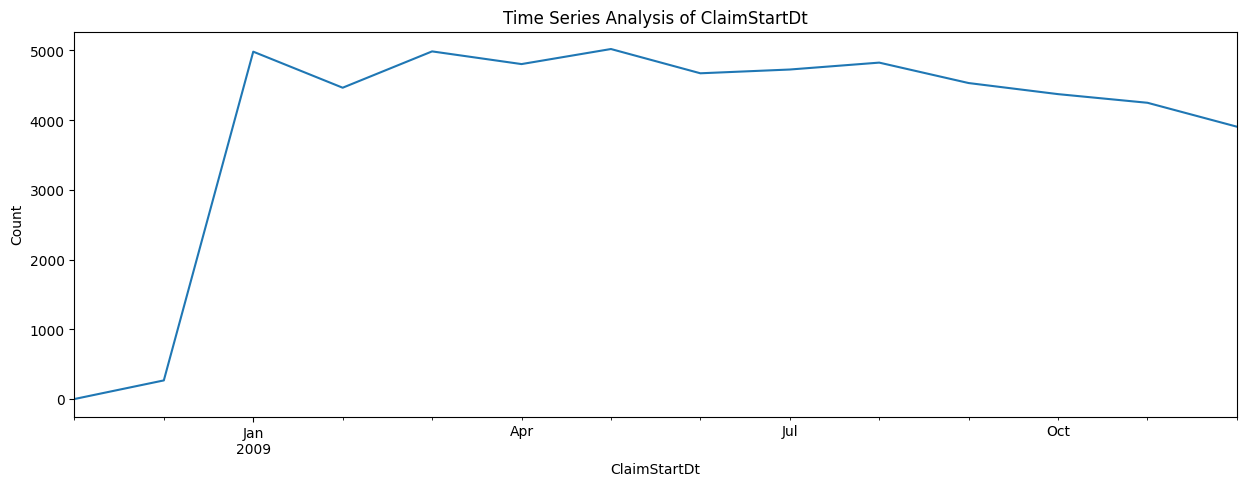

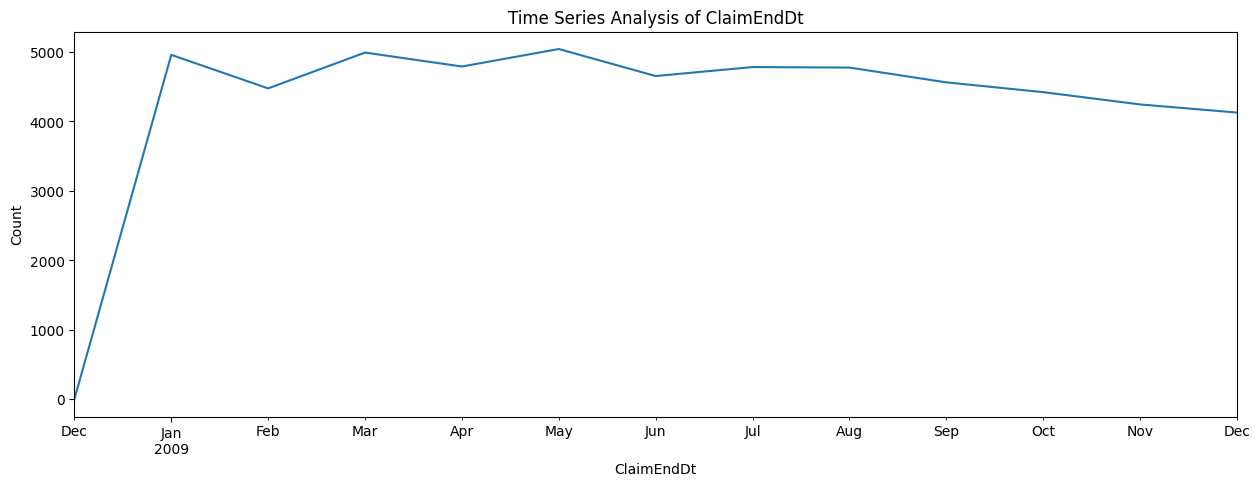

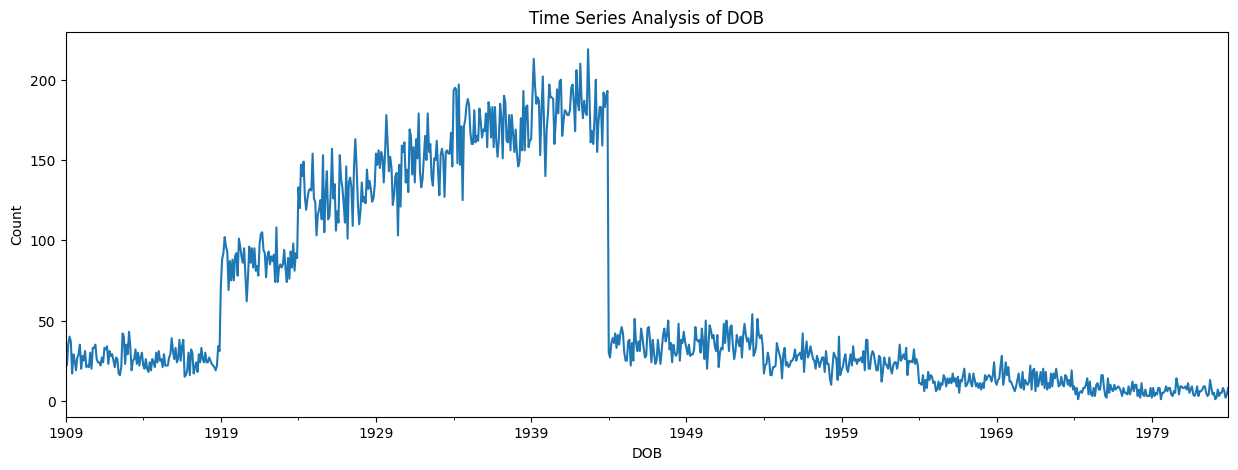

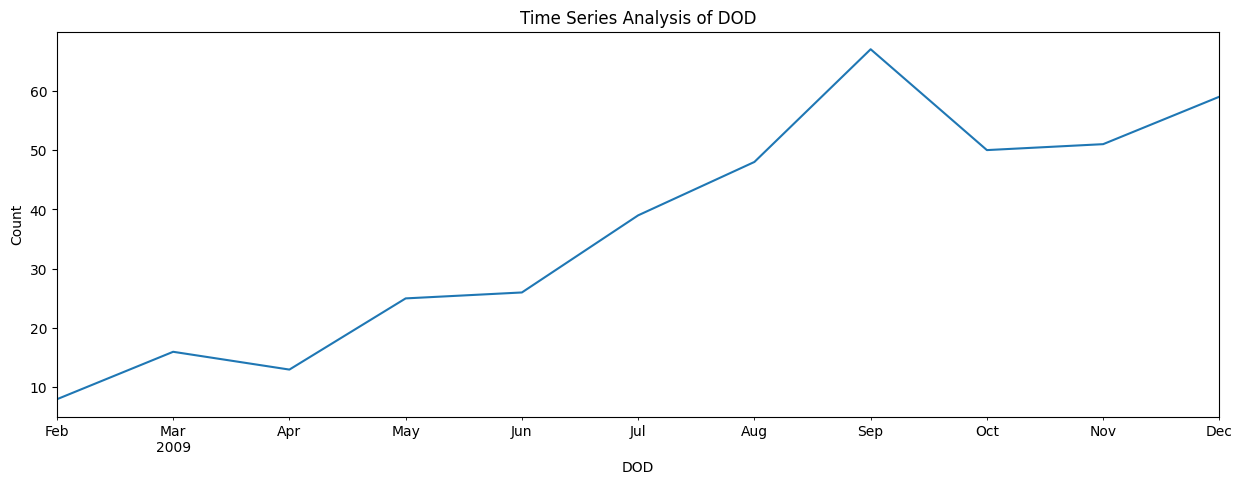

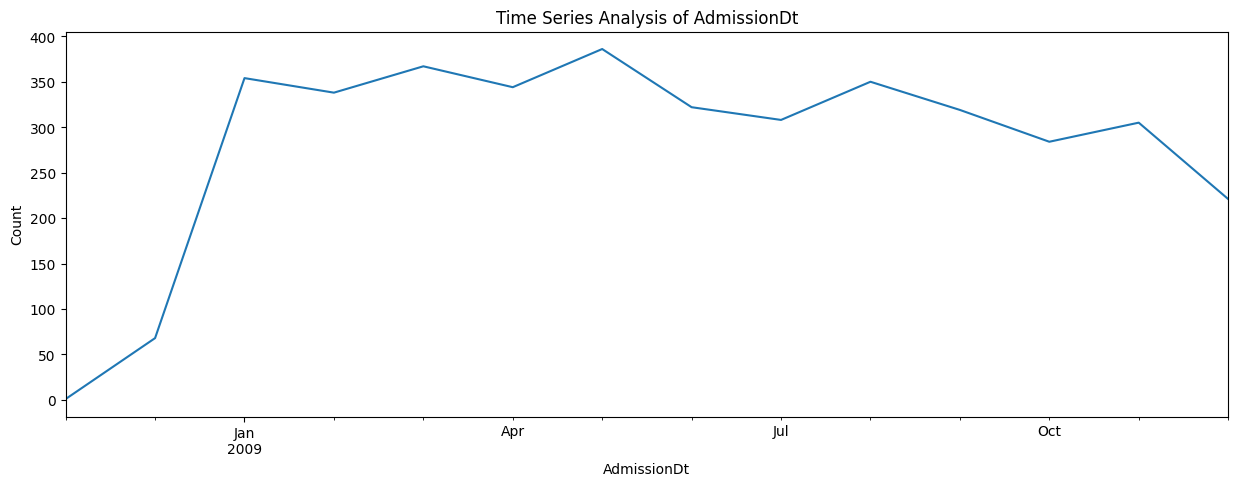

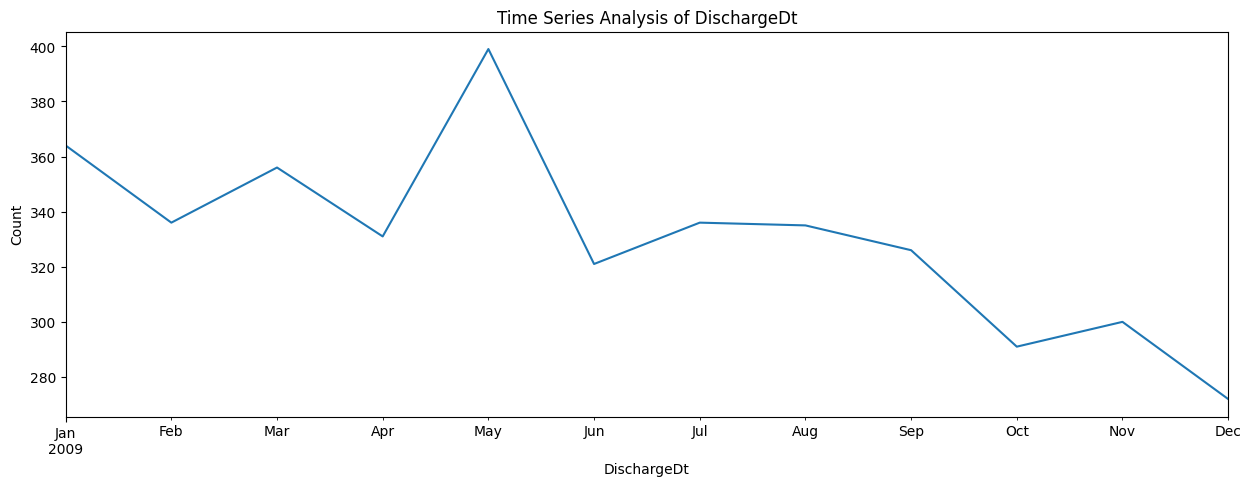

In [8]:
date_columns = ['ClaimStartDt','ClaimEndDt','DOB','DOD','AdmissionDt','DischargeDt'] 
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')
        data.set_index(col).resample('ME').size().plot(figsize=(15, 5), title=f'Time Series Analysis of {col}')
        plt.ylabel('Count')
        plt.show()